## Table of Contents

* [Scenario](#chapter1)
* [About the project](#chapter2)

* [1.Data Inspection](#chapter3)
    * [1.1 Data Understanding](#section_3_1)
    * [1.2 Checking the data types](#section_3_2)
    * [1.3 Checking the missing values](#section_3_3)
    
* [2.Exploratory Data Analysis](#chapter4)
    * [1.Users of each Tool](#section_4_1)
    * [2.Counting the users of each tool](#section_4_2)
    * [3.Plotting the most popular tools](#section_4_3)
    * [4.R vs Python Debate](#section_4_4)
    * [5.Plotting R vs Python users](#section_4_5)
    * [6.Language recommendations](#section_4_6)
    * [7.Most Recommended language by preferred language](#section_4_7)
    * [8.Number of survey respondents by Employer Industry](#section_4_8)
    * [9.Top 5 used Algorithms](#section_4_9)
    * [10.Top 5 used Algorithms by R lovers](#section_4_10)
    * [11.Top 5 used Algorithms by Python lovers](#section_4_11)  

## 👀 Scenario <a class="anchor" id="chapter1">
Throughout the world of data science, there are many languages and tools that can be used to complete a given task.Although , we are able to use the tool we prefer, it is often important to work with similar platforms so that we can share our code with one another.

## ❓  About the project <a class="anchor" id="chapter2">
In this project , we will be analyzing a survey dataset from kaggle about which tools and languages professionals use in their day-to-day work. The dataset includes responses from over 10,000 people that write code to analyze data in their daily work.

## 🔎 1. Data Inspection <a class="anchor" id="chapter3">

In [2]:
# Loading the libraries 
library(tidyverse)
library(tidyr)
library(dplyr)

# Loading the data 
responses <- read.csv("C:/Users/Atolb/Downloads/kagglesurvey.csv")


Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



#### 1. Data Understanding <a class="anchor" id="section_3_1">

In [3]:
# getting a glimpse about the data 
glimpse(responses)

Rows: 10,153
Columns: 5
$ Respondent                   <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13~
$ WorkToolsSelect              <fct> "Amazon Web services,Oracle Data Mining/ ~
$ LanguageRecommendationSelect <fct> F#, Python, Python, Python, R, Python, Py~
$ EmployerIndustry             <fct> Internet-based, Mix of fields, Technology~
$ WorkAlgorithmsSelect         <fct> "Neural Networks,Random Forests,RNNs", "B~


 <div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| Respondent            |  Responder Id  |
| WorkToolsSelect              | The tools that the respondent use.              |
| LanguageRecommendationSelect                   | The language recommended by the survey respondent                                  |
| EmployerIndustry	     |  The industry in which the employer operates.  |
| WorkAlgorithmSelect   | The Algorithm chosen by the survey respondent |

#### 2. Checking the data types <a class="anchor" id="section_3_2">

In [4]:
sapply(responses,typeof)

Respondent              WorkToolsSelect 
                   "integer"                    "integer" 
LanguageRecommendationSelect             EmployerIndustry 
                   "integer"                    "integer" 
        WorkAlgorithmsSelect 
                   "integer"

We can see that 4 out of the 5 columns have an incorrect data type. 
These columns are : 
* WorkToolsSelect 
* LanguageRecommendationSelect 
* EmployerIndustry 
* WorkAlgorithmSelect

In [5]:
responses$WorkToolsSelect <- as.character(responses$WorkToolsSelect)
responses$LanguageRecommendationSelect <- as.character(responses$LanguageRecommendationSelect)
responses$EmployerIndustry  <- as.character(responses$EmployerIndustry)
responses$WorkAlgorithmsSelect <- as.character(responses$WorkAlgorithmsSelect)

In [6]:
str(responses)

'data.frame':	10153 obs. of  5 variables:
 $ Respondent                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ WorkToolsSelect             : chr  "Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl" "Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Micr"| __truncated__ "C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow" "Jupyter notebooks,Python,SQL,TensorFlow" ...
 $ LanguageRecommendationSelect: chr  "F#" "Python" "Python" "Python" ...
 $ EmployerIndustry            : chr  "Internet-based" "Mix of fields" "Technology" "Academic" ...
 $ WorkAlgorithmsSelect        : chr  "Neural Networks,Random Forests,RNNs" "Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression" "Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,Regression/Logistic Regression,SVMs" "Bayesian Techniques,CNNs,Decision Trees,Gradient Boosted Machines,Neural Networks,Random Forests,Regression/Log"| __truncated_

It seems that the columns data types are now correct.

#### 3. Checking the missing values <a class="anchor" id="section_3_3">

In [8]:
sum(is.na(responses))

[1] 0

There are no missing values in the dataset :) 

## ⚙️ 2. Exploratory Data Analysis <a class="anchor" id="chapter4">

In [9]:
head(responses,3)

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs"
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression"
3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,Regression/Logistic Regression,SVMs"


#### 1.Users of each Tool <a class="anchor" id="section_4_1">
We are interested in knowing how many people use each tool that of the tools that were listed in the column WorkToolsSelect. As we can see from the dataframe subset we have above , the respondents listed multiple tools that are each separated by a comma.
Therefore , we need to separate out all of the tools used by each individual.

In [10]:
tools <- responses %>% 
mutate(work_tools = str_split(WorkToolsSelect,",")) %>% 
unnest(work_tools)

In [11]:
head(tools,1)

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect,work_tools
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",Amazon Web services


#### 2.Counting the users of each tool <a class="anchor" id="section_4_2">

In [12]:
tool_count <- tools %>%
group_by(work_tools) %>%
summarise(count=n()) %>%
arrange(desc(count))
# printing the top 5 tools 
head(tool_count)

work_tools,count
Python,6073
R,4708
SQL,4261
Jupyter notebooks,3206
TensorFlow,2256
,2198


#### 3.Plotting the most popular tools <a class="anchor" id="section_4_3">

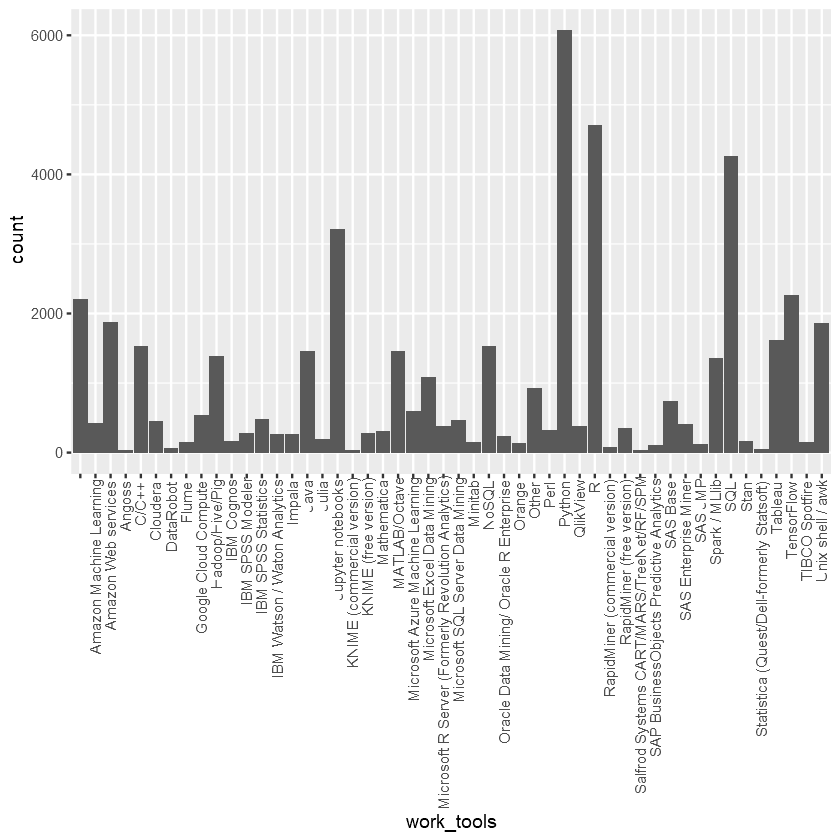

In [13]:
ggplot(tool_count,aes(x=work_tools,y=count)) + 
    geom_bar(stat="identity") +
    theme(axis.text.x = element_text(angle = 90, 
                 vjust = 0.5,
                 hjust = 1))

We can see from the figure above that R and Python are the two most commonly used languages.

#### 4. R vs Python Debate <a class="anchor" id="section_4_4">
Although R and Python are the most commonly used languages , it's possible that many respondents use both R and Python. 
Let's look at how many people use R , Python and both tools.

In [20]:
debate_tools <- responses %>%
mutate(language_preference = case_when(
         str_detect(WorkToolsSelect,"R") & ! str_detect(WorkToolsSelect , "Python") ~ "R", 
         str_detect(WorkToolsSelect,"Python") & ! str_detect(WorkToolsSelect,"R") ~ "Python", 
         str_detect(WorkToolsSelect,"R") & str_detect(WorkToolsSelect , "Python") ~ "Both",
    TRUE ~ "neither"))

In [21]:
debate_tools %>%
group_by(language_preference) %>%
summarise(count=n()) %>%
arrange(desc(count))

language_preference,count
Both,3660
neither,2860
Python,2413
R,1220


13% of the respondents use R while around 24% use Python which indicates that Python is preferred over R. However around 37% of the respondents use both tools.

#### 5. Plotting R vs Python users <a class="anchor" id="section_4_5">

In [28]:
debate_plot <- debate_tools %>%
group_by(language_preference) %>%
summarise(count=n()) %>%
filter(language_preference != "neither")

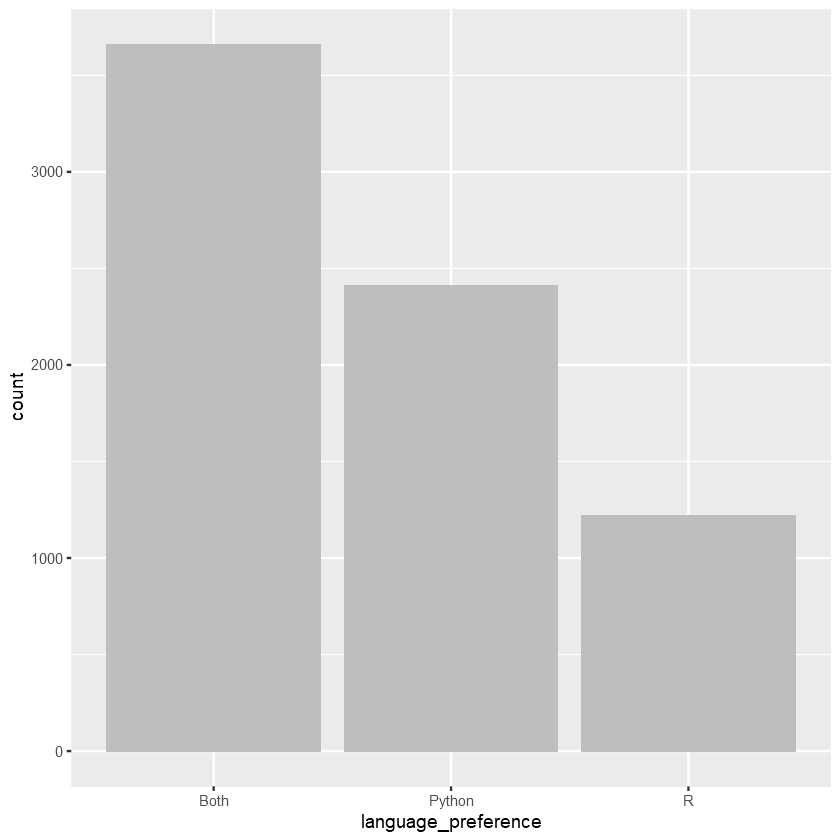

In [29]:
ggplot(debate_plot , aes(x=language_preference,y=count)) + 
geom_bar(stat="identity",fill="grey")

#### 6.Language recommendations <a class="anchor" id="section_4_6">
As we have seen before , the largest group of professionals program in both Python and R. But which language do they recommend to new learners. Do R lovers always recommend R?

In [34]:
recommendations <- debate_tools %>%
group_by(language_preference , LanguageRecommendationSelect) %>%
summarise(count=n()) %>%
arrange(language_preference,desc(count)) %>%
mutate(row = row_number()) %>% 
filter(row <= 4)
head(recommendations)

`summarise()` has grouped output by 'language_preference'. You can override using the `.groups` argument.



language_preference,LanguageRecommendationSelect,count,row
Both,Python,1917,1
Both,R,912,2
Both,,591,3
Both,SQL,108,4
neither,,2348,1
neither,Python,196,2


#### 7.Most Recommended language by preferred language <a class="anchor" id="section_4_7">

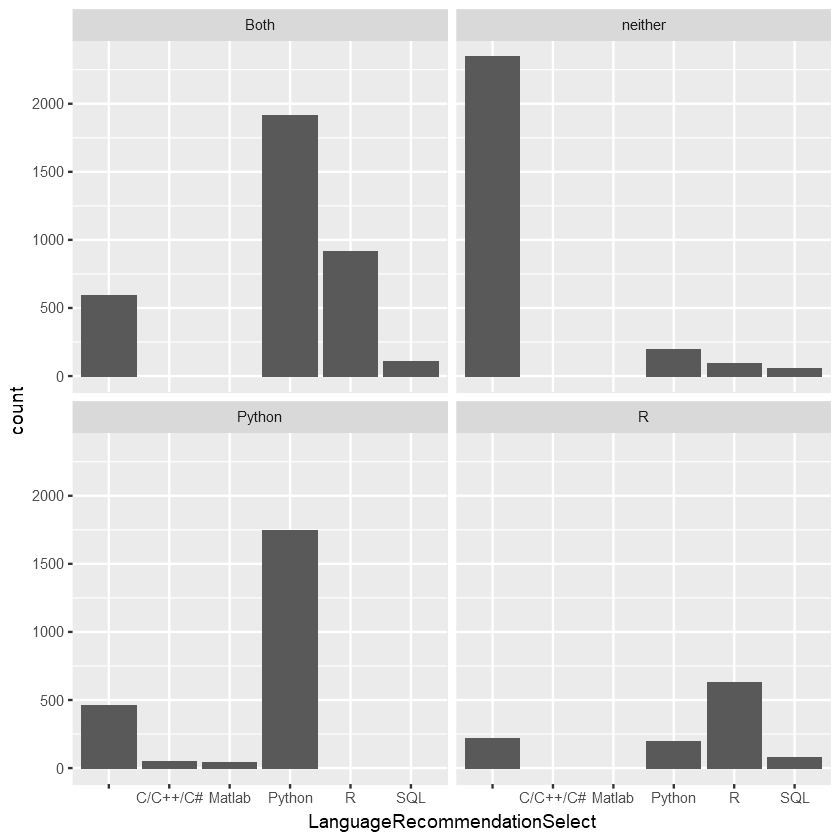

In [35]:
ggplot(recommendations,aes(x=LanguageRecommendationSelect,y=count)) + 
geom_bar(stat = "identity") + 
facet_wrap(~language_preference) 

As we can see from the figure above , Python users highly recommend that new learners learn python. The same happens with R users they highly recommend R to new learners. However, programmers that use both languages tend to recommend Python to new learners.

#### 8. Number of survey respondents by Employer Industry <a class="anchor" id="section_4_8">

In [38]:
responses %>%
group_by(EmployerIndustry) %>%
summarise(count=n()) %>%
arrange(desc(count))

EmployerIndustry,count
Technology,1839
Academic,1450
,1155
Financial,965
Mix of fields,825
Other,808
Internet-based,633
Government,474
CRM/Marketing,343
Telecommunications,308


Most of the survey respondents work in the Technology industry followed by the Academic industry.

#### 9.Top 5 used Algorithms <a class="anchor" id="section_4_9">

In [64]:
Algorithms <- debate_tools %>% 
mutate(algorithm = str_split(WorkAlgorithmsSelect,",")) %>% 
unnest(algorithm)

In [73]:
Algorithms %>%
group_by(algorithm) %>%
summarise(count=n()) %>%
arrange(desc(count)) %>%
head(5)

algorithm,count
Regression/Logistic Regression,4636
Decision Trees,3640
Random Forests,3378
,2852
Neural Networks,2743


#### 10.Top 5 used Algorithms by R lovers <a class="anchor" id="section_4_10">

In [74]:
# which algorithm does R lovers use the most 
Algorithms %>%
filter(language_preference == "R") %>%
group_by(algorithm) %>%
summarise(count=n()) %>% 
arrange(desc(count)) %>%
head(5)

algorithm,count
Regression/Logistic Regression,786
Decision Trees,590
Random Forests,447
Bayesian Techniques,289
Neural Networks,229


#### 11.Top 5 used Algorithms by Python lovers <a class="anchor" id="section_4_11">


In [67]:
# which algorithm does Python lovers use the most 
Algorithms %>%
filter(language_preference == "Python") %>%
group_by(algorithm) %>%
summarise(count=n()) %>% 
arrange(desc(count)) %>%
head(5)

algorithm,count
Regression/Logistic Regression,1108
Neural Networks,1057
Decision Trees,824
Random Forests,814
CNNs,684


It seems that Both R lovers and python lovers mostly  use the Regression Algorithm in their machine learning projects.